# Asymptotic Analysis

In the previous section, we established a framework for analyzing the work performed by an algorithm. 

> When analyzing an algorithm, we want to calculate, assuming the **worst case** input, the number operations required by that algorithm as a function of the input problem size.

Another way of thinking about this is that we are concerned with how the number of operations required by an algorithm grows as the problem size increases. 

For `linear-search`, we expressed this as a function: $f(n) = c_1n + c_2n + c_4$ where the constants represent the costs of individual instructions and $n$ is the size of the input list.

This is exact, but it is tedious, and for simplicity and maximal abstraction, we want to avoid instruction specific constants.


## Our Major Concern: Growth Rates

While we were able to come up with an exact expression for the work of `linear-search`, what really matters is the growth rate of our expression rather than the details of it. For example, no matter the constants, linear functions always grow slower than quadratic ones.

How do we know this? Using calculus and derivatives, we can compare the rates of change of the two functions:

Let $f(n) = c_1n + c_2$

Let $g(n) = c_3n^2 + c_4n + c_5$

Where all $c_i$ represent instruction/machine dependent constants.

Then 

$f'(n) = c_2$

$g'(n) = 2c_3n + c_4$

The rate of change of $f(n)$ is the constant whereas the rate of change of $g(n)$ is linear. No matter the constants, $g(n)$ grows at a faster rate than $f(n)$.

An effect of this is that if we plot any linear function against any quadratic functions there will always be some point after which the quadratic function is always larger.

Let's look at a specific example to solidify an intuitive understanding. Suppose we have specific constants for two algorithms:

- algorithm 1: $120n - 2000$
- algorithm 2: $n^2$

We can plot them using some python libraries:

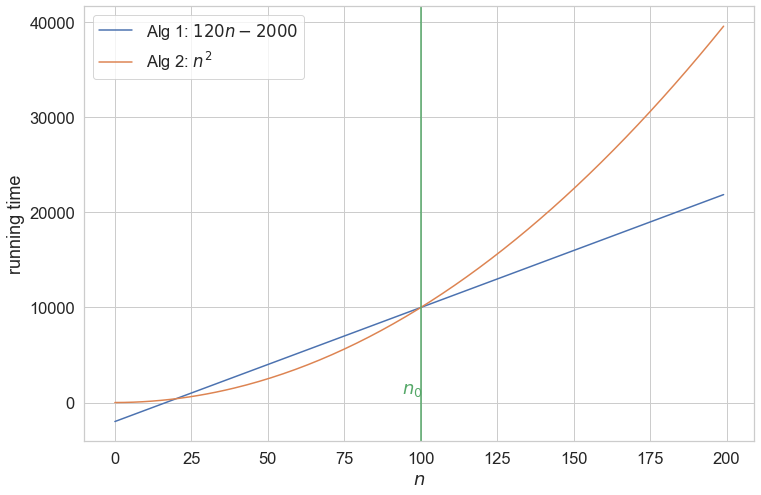

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 8)})

n = np.arange(200)
time1 = 120*n - 2000
time2 = n**2

# plot
plt.figure()
plt.plot(n, time1, label='Alg 1: $120 n - 2000$')
plt.plot(n, time2, label='Alg 2: $n^2$')
plt.axvline(100, color='g')
plt.text(94,1000,'$n_0$', fontsize=18, color='g')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

In the plot, the important thing to note is that even though for some $n$, the quadratic algorithm is less than the linear, there is a point $n_0$ after which the quadratic algorithm is **always** greater than or equal to the linear algorithm.

Put another way, as $n \rightarrow \infty$, there will be a point at which algorithm 2 will be slower. This is true **no matter what the constants actually are.**

This leads to the concept of **asypmtotic dominance**.

### Asymptotic Dominance

Function $g(n)$ **asymptotically dominates** function $f(n)$ if **there exist** positive constants $c$ and $n_0$ such that

$ f(n) \le c \cdot g(n)$ **for all** $n \ge n_0$

In other words, if, for all sufficiently large $n$, $f(n)$ is always less than or equal to a constant multiple of $g(n)$, then $g(n)$ **asymptotically dominates** $f(n)$.

**About the constant $c$**

The constant $n_0$ in this definition is pretty straight forward. But why is the constant $c$ necessary?

The key is in the equality in the definition. As we will see, asymptotic dominance will not only allow us to rank functions from lowest growth rates to highest growth rates, but we can also identify functions which are asymptotically equivalent. Two functions are asymptotically equivalent if one grows at a rate no more than a constant factor of the other.

For example: 

$f(n)=n$ and $g(n)=2n$ are asymptotically equivalent since $g(n)$ is always at most $2*f(n)$

$g(n)=2n$ and $h(n)=n^2$ are NOT asymptotically equivalent because the order of their growth differs. There is no constant factor which could make them equivalent.

The constant $c$ in the definition allows us to capture this equivalency.

It also allows us to ignore machine dependent constants like we included for linear search. Since asymptotically $c_1n$ is equivalent to $n$ we can ignore the $c_1$, simplifying our analysis!

### Asymptotic Dominance Example:

$n^2$ asymptotically dominates $120 n - 2000$

**Proof:**

> To prove this, we just need to find $c$ and $n_0$ such that
> 
> $120 n - 2000 \leq c*n^2$  for all $n>n_0$

Let $c=1$. Then we can solve for $n_0$ such that 

$
120 n - 2000 \leq n^2 \\
$
for all $n \ge n_0$

$
\begin{align}
120n - 2000 & \leq n^2 \\
0 & \leq n^2 - 120n + 2000\\
0 & \leq (n-100)(n-20)\\
\end{align}
$


When $n=100$, $120n - 2000 = n^2 $

For all $n \ge 100$, $120n - 2000 \le n^2 $

So, $c=1, n_0=100$ satisfies the definition of asymptotic dominance. $\blacksquare$

# Key Idea

**Asymptotic Dominance**: 

Asymptotic dominance captures the idea of an upper bound. If, within a constant factor, one function is asymptotically greater than or equal to another then that function asymptotically dominates the other.

Put more rigorously, for some $c$, and after $n=n_0$, if $c*g(n) >= f(n)$, for positive $c$ and $n_0$, then $g(n)$ asymptotically dominates $f(n)$.

## Asymptotic Notation

With our definition of asymptotic dominance, we can now define notations to allow us to express asymptotic relationships between functions.

Our three major notations are "Big-Oh", "Omega", and "Theta":

<br>

**Big-Oh:**

$$f(n) \in \mathcal{O}(g(n)) \iff g(n) \hbox{ asymptotically dominates } f(n)$$

$\mathcal{O}()$ allows us to state an **upper bound**. $f(n)$ is bounded above by $g(n)$

<br>

**Omega:**

$$f(n) \in \Omega(g(n)) \iff f(n) \hbox{ asymptotically dominates } g(n)$$

$\Omega()$ allows us to state an **lower bound**. $f(n)$ is bounded below by $g(n)$

<br>

**Theta:**

$$f(n) \in \Theta(g(n)) \iff \{f(n) \in \mathcal{O} (g(n)) \wedge f(n) \in \Omega (g(n))\}$$

$\Theta()$ allows us to state equality. If $f(n)$ is both bounded below and above by $g(n)$, then $f(n)$ and $g(n)$ are asympototically equivalent.

### Intuition

"Big-Oh" represents an upper bound, as in, $f(n)$ is bounded above by $g(n)$.

"Omega" represents a lower bound. $f(n)$ is bounded below by $g(n)$.

"Theta" represents equality. If $f(n)$ is bounded both above and below by $g(n)$, then $f(n)$ is asymptotically equivalent to $g(n)$.

### Examples

Here are a few more examples to illustrate the notation.

<br>

$120n - 2000 \in \mathcal{O}(n^2)$

<br>

$10n^3 + n^2 - 100 \in \Omega(n^2)$

<br>

$14n^2 - 5n +50 \in \Theta(n^2)$

<br>

$2n \in \mathcal{O}(n)$

## Formal Definitions

**Big-Oh**

$f(n) \in \mathcal{O}(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ f(n) \le c \cdot g(n)$ **for all** $n \ge n_0$

**Omega**

$f(n) \in \Omega(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ f(n) \ge c \cdot g(n)$ **for all** $n \ge n_0$

**Theta**

$f(n) \in \Theta(g(n))$ if **there exist** positive constants $c_1$, $c_2$, and $n_0$ such that

$c_1*g(n) \le f(n) \le c_2*g(n)$ **for all** $n \ge n_0$

In other words:

$ f(n) \in \mathcal{O}(g(n)) \hbox{ and } f(n) \in \Omega(g(n))$



In addition to these main three which all allow for equality, there are also two "little" notations which represent strictly less than and strictly greater than:

**Little-oh**

$f(n) \in o(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ f(n) \lt c \cdot g(n)$ **for all** $n \ge n_0$

**Little-omega**

$f(n) \in \omega(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ f(n) \gt c \cdot g(n)$ **for all** $n \ge n_0$

### The "little" notations

The "little" notations capture the idea that the rate of growth of one of the functions significantly more or less than the other. That is, the rate of growth is greater than any constant factor.

While the "big" notations capture the idea of asymptotic equivalency, the "little" notations explicitly omit it.

$f(n) \in o(g(n)) \iff f(n) \in \mathcal{O}(g(n)) \text{ and } f(n) \notin \Theta(g(n))$

**Intuition:**

|$\mathcal{O}~~~$ | $\Omega~~~$ | $\Theta~~~$ | $\mathcal{o}~~~$ | $\omega~~~$ |
|--------------|----------|----------|---------------|----------|
| $\leq~~~$       | $\geq~~~$   | $=~~~$      | $\lt~~~$         | $\gt~~~$    |    

### More Examples

Here are a few more examples to illustrate this idea.

<br>

$n \in \mathcal{O}(n^2)$

$n \in o(n^2)$

<br>

$n \in \mathcal{O}(n)$

$n \in \Theta(n)$

$n \notin o(n)$

## Conventions

It is important to note that we use asymptotic notations to represent sets of functions.

E.g, $\mathcal{O}(g(n))$ is the set of functions that are asymptotically dominated by $g(n)$.

This is why we write:

$n \in \mathcal{O}(n^2)$

rather than

$n = \mathcal{O}(n^2)$

The latter is technically incorrect, although sometimes the notation is abused in that way.

### Constants and lower order terms

Since growth rates are determined by the highest order term and constants don't matter, we can ignore them!

It would be improper to write $\mathcal{O}(3.14n^2 + 2.718n + 1.618)$

Rather, simply write $\mathcal{O}(n^2)$

### A Few Common Functions in Asymptotic Analysis

- $1$
- $\log n$
- $\log^2 n$
- $n$
- $n \log n$
- $n^2$
- $2^n$

$\mathcal{O}(1)$ is referred to as "constant time". Algorithms which require a constant number of operations no matter how large the problem size run in constant time. For example, no matter how large a list is, retrieving the 0th element always takes the same number of operations.

We refer $\mathcal{O}(n^c)$ for any constant $c$ as "polynomial time". Algorithms which are polynomial time are generally considered efficient, as in, they run in reasonable time frames on classical computers.

# Proving Asymptotic Relationships

As we saw above, in the proof that $n^2$ asympotically dominates $120 n - 2000$, we can prove asymptotic relationships by showing that the constants exist which satisfy the relevant definition.

### Another Example



Prove that $2n \in \mathcal{O}(n)$.

By the definition $2n \in \mathcal{O}(n)$ if **there exist** positive constants $c$ and $n_0$ such that

$ 2n \le c \cdot n$ **for all** $n \ge n_0$

Let $c=2$ and $n_0 = 1$

Then $2n \le 2n$ which is clearly true for all $n \ge 1$. $\blacksquare$

### A Second Method for Proving Asymptotic Relationships

Since asymptotic relationships are defined by growth rates between functions as $n$ gets larger and larger, we can directly examine these growth rates to determine asymptotic relationships!

# The Limit Theorem

We can use limits to prove asymptotic relationships!

If the following limit exists, it is very useful:

$$\lim_{n \to \infty} \frac{f(n)}{g(n)}$$

Why? Its result inherently illustrates the relationship between the rates of growth of the two functions!

**If this limit goes to 0**, then $g(n)$ must be growing at a faster rate than $f(n)$. 

In this case, $g(n)$ is asymptotically dominating $f(n)$. Then:

$$f(n) \in \mathcal{O}(g(n)) \text{ and } f(n) \in o(g(n))$$



**If this limit goes to $\infty$**, then $f(n)$ must be growing at a faster rate than $g(n)$. 

In this case, $f(n)$ is asymptotically dominating $g(n)$:

$$f(n) \in \Omega(g(n)) \text{ and } f(n) \in \omega(g(n))$$



**If this limit goes to a constant**, then both functions are growing at at rate no more than a constant factor of each other. 

In this case, both functions are asymptotically equivalent:

$$f(n) \in \Theta(g(n))$$

Note: since both $\mathcal{O}()$ and $\Omega()$ include equality in their definitions, it is also correct to say in this case that

$f(n) \in \mathcal{O}(g(n))$ and $f(n) \in \Omega(g(n))$

See the definition of $\Theta()$ above. That said, it is most specifically accurate to use $\Theta()$. 

### The Limit Theorem

If $\lim_{n \to \infty} \frac{f(n)}{g(n)}$ exists,

$$
\lim_{n \to \infty} \frac{f(n)}{g(n)} =
\begin{cases}
  0  & \iff f(n) \in \mathcal{O}(g(n)) \text{ and } o(g(n)) \\
  c  & \iff f(n) \in \Theta(g(n)) \text{, } \mathcal{O}(g(n)) \text{, } \Omega(g(n)) \\
  \infty  & \iff f(n) \in \Omega(g(n)) \text{ and } \omega(g(n)) \\
\end{cases}
$$

Note, in the constant case, it is technically correct to state that $f(n) \in \mathcal{O}(g(n)) \text{ and } \Omega(g(n))$, but it is most specific use $\Theta$.

### Proving these cases

We used used asymptotic reasoning above to argue for the $0$ and $\infty$ cases. We could also more rigorously prove these things.

For example, for the constant case:



**Prove that:**

$$ f(n) \in \Theta(g(n)) \Longrightarrow \lim_{n \to \infty} \frac{f(n)}{g(n)} = c$$

**Proof**

If $f(n)$ is $\Theta(g(n))$, then there exists constants $c_1$, $c_2$, and $n_o$ such that:

$c_1*g(n) \le f(n) \le c_2*g(n)$ **for all** $n \ge n_0$

Dividing by $g(n)$ yields:

$c_1 \le \frac{f(n)}{g(n)} \le c_2$ **for** $n \ge n_0$

Since $\frac{f(n)}{g(n)}$ is bounded by two constants, then it must be a constant.

Thus, $\lim_{n \to \infty} \frac{f(n)}{g(n)} = c$

Therefore, in the case where $f(n) \in \Theta(g(n))$, the limit goes to a constant. $\blacksquare$

We are omitting proofs for the other two cases, but it could be fun to write them out and prove your understanding to yourself.

## Examples: Using the Limit Theorem



**Prove** that $an^2 + bn + c \in \Theta(n^2)$


$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^2} $$
$$ = \lim_{n \to \infty} a + \lim_{n \to \infty} \frac{b}{n} + \lim_{n \to \infty} \frac{c}{n^2} $$
$$ = a $$

Since the limit goes to a constant, $an^2 + bn + c \in \Theta(n^2)$ $\blacksquare$


**Prove** that $an^2 + bn + c \in \mathcal{O}(n^3)$


$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^3} $$
$$ = \lim_{n \to \infty} \frac{a}{n} + \lim_{n \to \infty} \frac{b}{n^2} + \lim_{n \to \infty} \frac{c}{n^3} $$
$$ = 0 $$

Since the limit goes to a $0$, $an^2 + bn + c \in \mathcal{O}(n^3)$ $\blacksquare$


**Prove** that $an^2 + bn + c \in \Omega(n)$


$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n} $$
$$ = \lim_{n \to \infty} an + \lim_{n \to \infty} \frac{b} + \lim_{n \to \infty} \frac{c}{n} $$
$$ = \infty $$

Since the limit goes to a $\infty$, $an^2 + bn + c \in \Omega(n)$ $\blacksquare$


## Simplifying Limits, L'Hôpital's Rule



Not all limits are so easy to evaluate, sometimes we want to simply the numerator and denominator in order to evaluate the limit.

To do so, we can use L'Hôpital's Rule which states:

If $\lim_{n \to \infty} \frac{f(n)}{g(n)}$ exists,

$$\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{f'(n)}{g'(n)}$$

When the derivatives of functions are simpler than the original functions, this rule can help simplify the limit for evaluation.